**Inserting Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

**Importing Data**

In [ ]:
powerPlant = pd.read_csv("dataset.csv", header=0, names=['Temp_C', 'Vacuum_cm-Hg', 'Pressure_milibar', 'Humidity_%', 'Power_MW'])

In [ ]:
powerPlant

,Temp_C,Vacuum_cm-Hg,Pressure_milibar,Humidity_%,Power_MW
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


**Loading imported dataset**

In [ ]:
powerPlant.head()
powerPlant.describe().T



,count,mean,std,min,25%,50%,75%,max
Temp_C,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
Vacuum_cm-Hg,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
Pressure_milibar,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
Humidity_%,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
Power_MW,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


**Finding correlation matrix**

In [ ]:
powerPlant.corr()

,Temp_C,Vacuum_cm-Hg,Pressure_milibar,Humidity_%,Power_MW
Temp_C,1.000000,0.844107,-0.507549,-0.542535,-0.948128
Vacuum_cm-Hg,0.844107,1.000000,-0.413502,-0.312187,-0.869780
Pressure_milibar,-0.507549,-0.413502,1.000000,0.099574,0.518429
Humidity_%,-0.542535,-0.312187,0.099574,1.000000,0.389794
Power_MW,-0.948128,-0.869780,0.518429,0.389794,1.000000


**Plotting correlation matrix in heatmap**

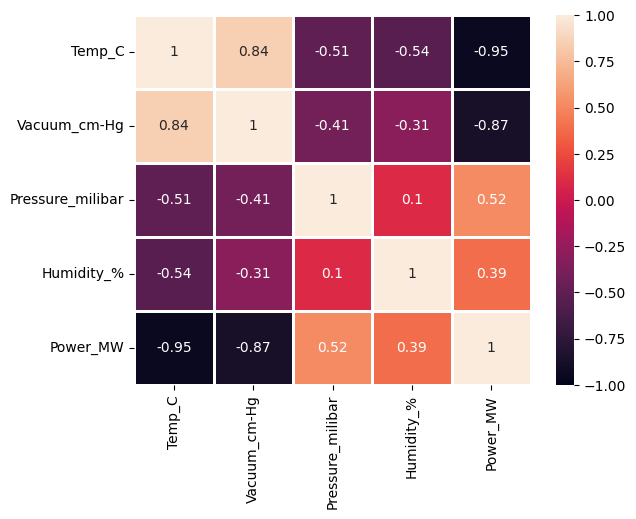

In [ ]:
import seaborn as sb
dataplot = sb.heatmap(powerPlant.corr(), vmin=-1, vmax=1, annot=True, linewidths=1)

**Plotting all possible 2 combinations of variable on X Y axis**

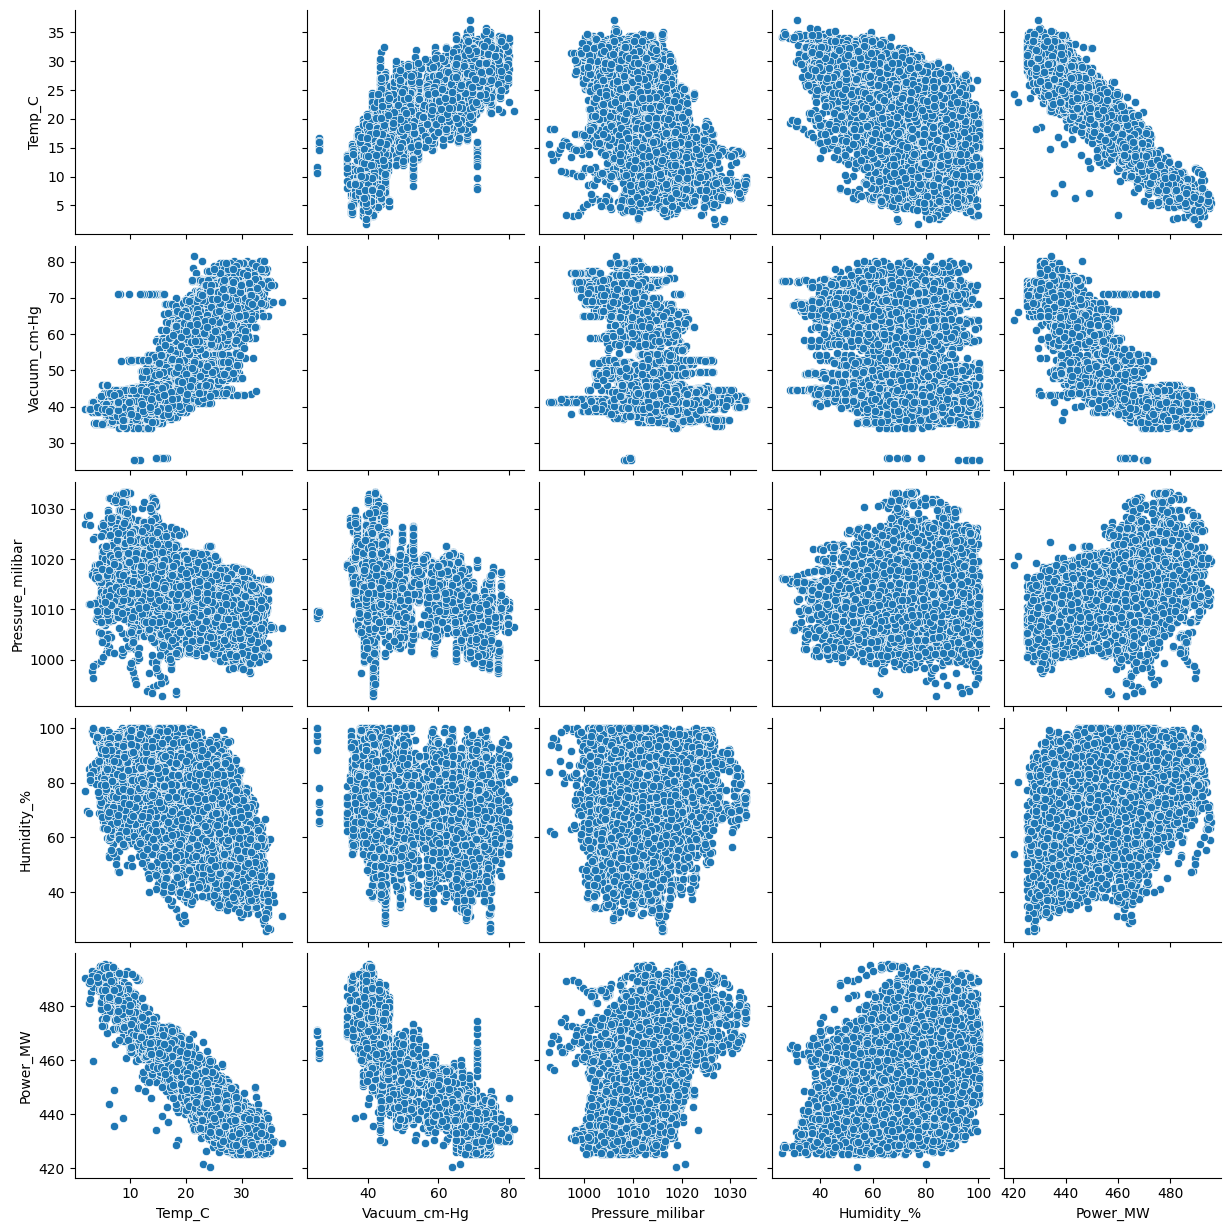

In [ ]:
sb.pairplot(powerPlant, diag_kind='none')

**Creating Test Train & Validation Data set**

In [ ]:
x=powerPlant[['Temp_C', 'Vacuum_cm-Hg', 'Pressure_milibar', 'Humidity_%']]
y=powerPlant.Power_MW

In [ ]:
from sklearn.model_selection import train_test_split
# 90 10 split
x_train_90_10, x_test_90_10, y_train_90_10, y_test_90_10 = train_test_split(x, y, test_size=0.1, random_state=42)
# 80 20 split
x_train_80_20, x_test_80_20, y_train_80_20, y_test_80_20 = train_test_split(x, y, test_size=0.2, random_state=42)


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(x_train_90_10)
x_train_90_10 = sc.transform(x_train_90_10)
x_test_90_10 = sc.transform(x_test_90_10)

#For 80_20 data
sc.fit(x_train_80_20)
x_train_80_20 = sc.transform(x_train_80_20)
x_test_80_20 = sc.transform(x_test_80_20)


# Linear Regression

**Training Model Using Linear Regression with 90 10 Split**

In [ ]:
# @title
from sklearn.linear_model import LinearRegression
lregressor = LinearRegression()
lregressor.fit(x_train_90_10, y_train_90_10)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
scores_90_10={'Model name': ["Linear regression","KNN","Gradientboosted Regression","ANN"], "mse":[],"R^2":[],"rmse":[],"mae":[]}
print(scores_90_10)

{'Model name': ['Linear regression', 'KNN', 'Gradientboosted Regression', 'ANN'], 'mse': [], 'R^2': [], 'rmse': [], 'mae': []}


In [ ]:
# Predict on the testing data
y_pred_90_10=lregressor.predict(x_test_90_10)

In [ ]:
# compute R^2 and MSE
r2 = r2_score(y_test_90_10, y_pred_90_10)
mse=mean_squared_error(y_test_90_10, y_pred_90_10)
rmse=sqrt(mse)
mae=mean_absolute_error(y_test_90_10,y_pred_90_10)
scores_90_10['mse'].append(mse)
scores_90_10['R^2'].append(r2)
scores_90_10['rmse'].append(rmse)
scores_90_10['R^2'].append(mae)
print("R^2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(r2,mse,rmse,mae))

R^2: 0.94, MSE: 18.17, RMSE: 4.26, MAE: 3.43


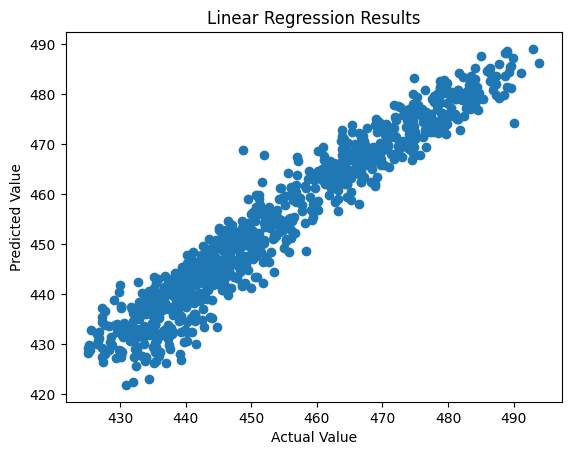

In [ ]:
#plot the predicted and actual values
plt.scatter(y_test_90_10, y_pred_90_10)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title("Linear Regression Results")
plt.show()

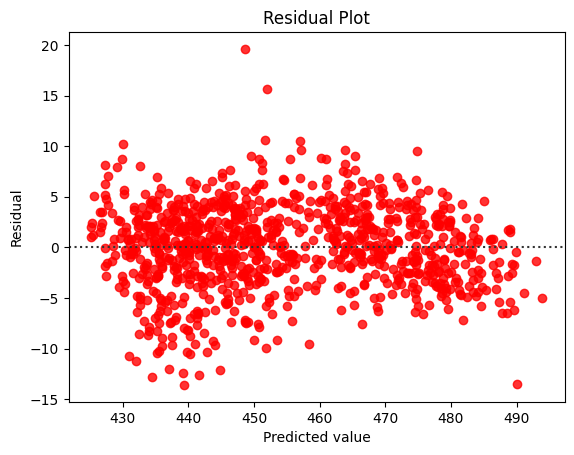

In [ ]:
import seaborn as sns
sns.residplot(x=y_test_90_10, y=y_pred_90_10, color='red')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

In [ ]:
lregressor.score(x_test_90_10,y_test_90_10)

0.9362732132744209

**Training Model Using Linear Regression with 80 20 Split**

In [ ]:
# @title
from sklearn.linear_model import LinearRegression
lregressor = LinearRegression()
lregressor.fit(x_train_80_20, y_train_80_20)

LinearRegression()

Testing the model

In [ ]:
print(y_test_80_20)
y_predict_80_20 = lregressor.predict(x_test_80_20)

2513    433.27
9411    438.16
8745    458.42
9085    480.82
4950    441.41
         ...  
7204    456.70
1599    438.04
5697    467.80
350     437.14
6210    456.78
Name: Power_MW, Length: 1914, dtype: float64


In [ ]:
scores_80_20={'Model name': ["Linear regression","KNN","Gradientboosted Regression","ANN"], "mse":[],"R^2":[],"rmse":[],"mae":[]}

In [ ]:
# compute R^2 and MSE
r2 = r2_score(y_test_80_20, y_predict_80_20)
mse=mean_squared_error(y_test_80_20, y_predict_80_20)
rmse=sqrt(mse)
mae=mean_absolute_error(y_test_80_20,y_predict_80_20)
scores_80_20['mse'].append(mse)
scores_80_20['R^2'].append(r2)
scores_80_20['rmse'].append(rmse)
scores_80_20['R^2'].append(mae)
print("R^2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(r2,mse,rmse,mae))

R^2: 0.95, MSE: 14.06, RMSE: 3.75, MAE: 2.65


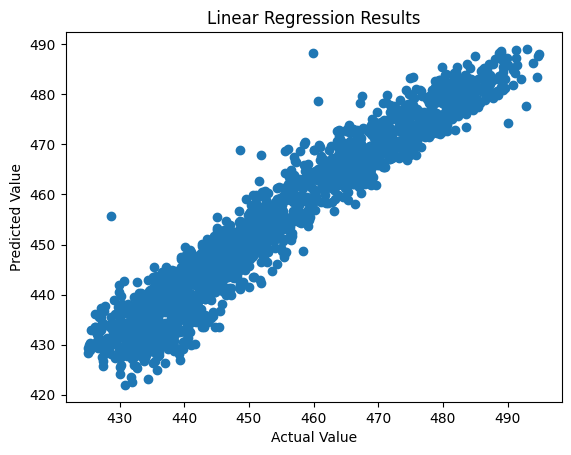

In [ ]:
#plot the predicted and actual values
plt.scatter(y_test_80_20, y_predict_80_20)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title("Linear Regression Results")
plt.show()

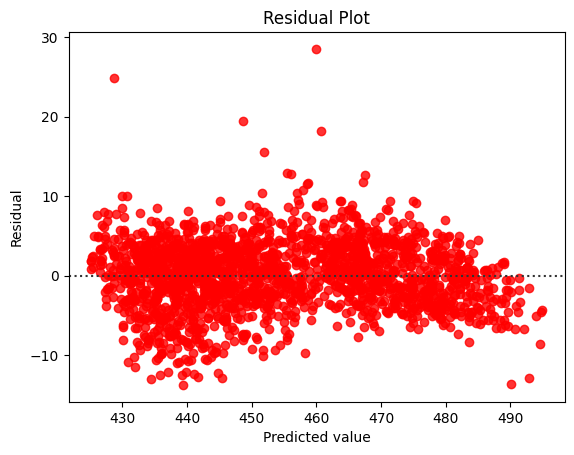

In [ ]:
import seaborn as sns
sns.residplot(x=y_test_80_20, y=y_predict_80_20, color='red')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

In [ ]:
lregressor.score(x_test_80_20,y_test_80_20)

0.931474793667036

# K Nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kregressor = KNeighborsRegressor(n_neighbors=3)
kregressor.fit(x_train_90_10, y_train_90_10)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_predict_90_10 = kregressor.predict(x_test_90_10)
scores_90_10={'Model name': ["Linear regression","KNN","Gradientboosted Regression","ANN"], "mse":[],"R^2":[],"rmse":[],"mae":[]}

In [ ]:
r2 = r2_score(y_test_90_10, y_predict_90_10)
mse=mean_squared_error(y_test_90_10, y_predict_90_10)
rmse=sqrt(mse)
mae=mean_absolute_error(y_test_90_10,y_predict_90_10)
scores_90_10['mse'].append(mse)
scores_90_10['R^2'].append(r2)
scores_90_10['rmse'].append(rmse)
scores_90_10['R^2'].append(mae)
print("R^2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(r2,mse,rmse,mae))

R^2: 0.95, MSE: 13.17, RMSE: 3.63, MAE: 2.64


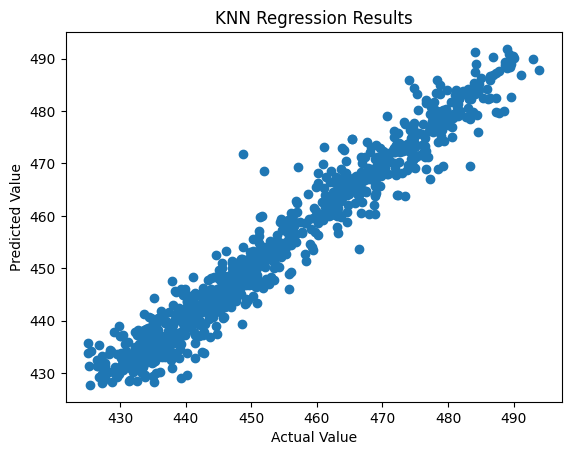

In [ ]:
#plot the predicted and actual values
plt.scatter(y_test_90_10, y_predict_90_10)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title("KNN Regression Results")
plt.show()

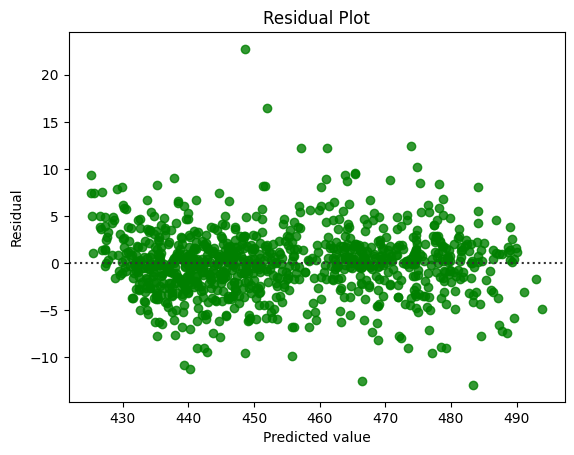

In [ ]:
import seaborn as sns
sns.residplot(x=y_test_90_10, y=y_predict_90_10, color='green')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

In [ ]:
kregressor.score(x_test_90_10,y_test_90_10)

0.9537897041985665

**For 80 20 split**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kregressor = KNeighborsRegressor(n_neighbors=3)
kregressor.fit(x_train_80_20, y_train_80_20)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_predict_80_20 = kregressor.predict(x_test_80_20)
scores_80_20={'Model name': ["Linear regression","KNN","Gradientboosted Regression","ANN"], "mse":[],"R^2":[],"rmse":[],"mae":[]}

In [ ]:
r2 = r2_score(y_test_80_20, y_predict_80_20)
mse=mean_squared_error(y_test_80_20, y_predict_80_20)
rmse=sqrt(mse)
mae=mean_absolute_error(y_test_80_20,y_predict_80_20)
scores_80_20['mse'].append(mse)
scores_80_20['R^2'].append(r2)
scores_80_20['rmse'].append(rmse)
scores_80_20['R^2'].append(mae)
print("R^2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(r2,mse,rmse,mae))

R^2: 0.95, MSE: 14.06, RMSE: 3.75, MAE: 2.65


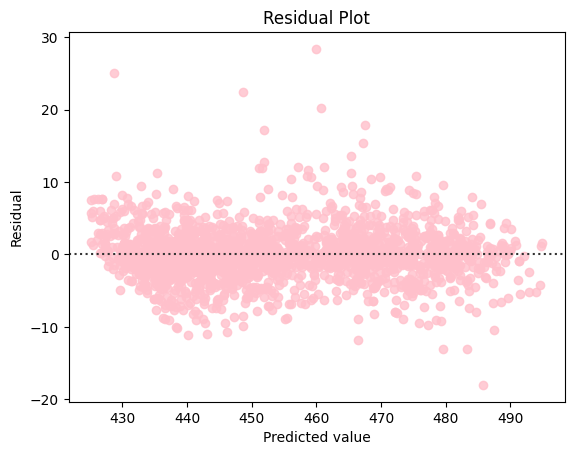

In [ ]:
import seaborn as sns
sns.residplot(x=y_test_80_20, y=y_predict_80_20, color='pink')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

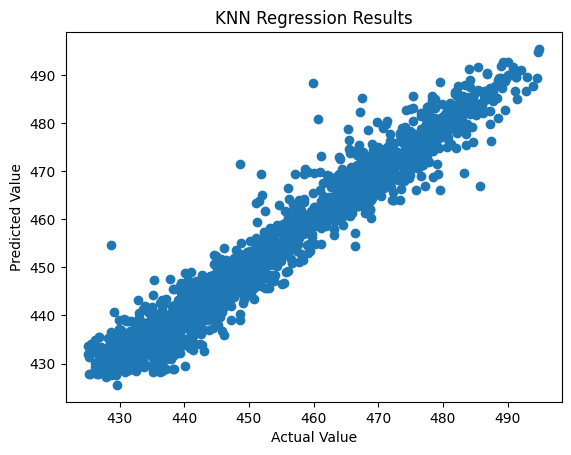

In [ ]:
plt.scatter(y_test_80_20, y_predict_80_20)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title("KNN Regression Results")
plt.show()

In [ ]:
kregressor.score(x_test_80_20,y_test_80_20)

0.9508500694731261

# Gradient Boosted Regression Tree

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

Training the model using 90 10 split

In [ ]:
gbrt = GradientBoostingRegressor(n_estimators=450, max_depth=20, learning_rate=0.1, loss='quantile', alpha=0.1)
gbrt.fit(x_train_90_10, y_train_90_10)

In [ ]:
y_pred_90_10 = gbrt.predict(x_test_90_10)

In [ ]:
scores_90_10={'Model name': ["Linear regression","KNN","Gradientboosted Regression","ANN"], "mse":[],"R^2":[],"rmse":[],"mae":[]}

In [ ]:
r2 = r2_score(y_test_90_10, y_pred_90_10)
mse=mean_squared_error(y_test_90_10, y_pred_90_10)
rmse=sqrt(mse)
mae=mean_absolute_error(y_test_90_10,y_pred_90_10)
scores_90_10['mse'].append(mse)
scores_90_10['R^2'].append(r2)
scores_90_10['rmse'].append(rmse)
scores_90_10['R^2'].append(mae)
print("R^2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(r2,mse,rmse,mae))

R^2: 0.95, MSE: 14.58, RMSE: 3.82, MAE: 2.89


In [ ]:
gbrt.score(x_test_90_10,y_test_90_10)

0.9488478795993306

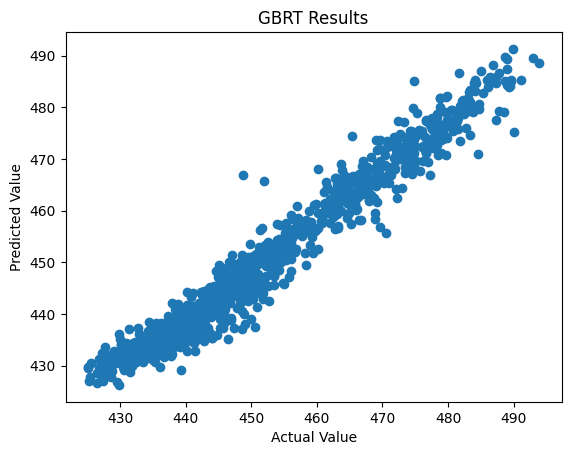

In [ ]:
plt.scatter(y_test_90_10, y_pred_90_10)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title("GBRT Results")
plt.show()

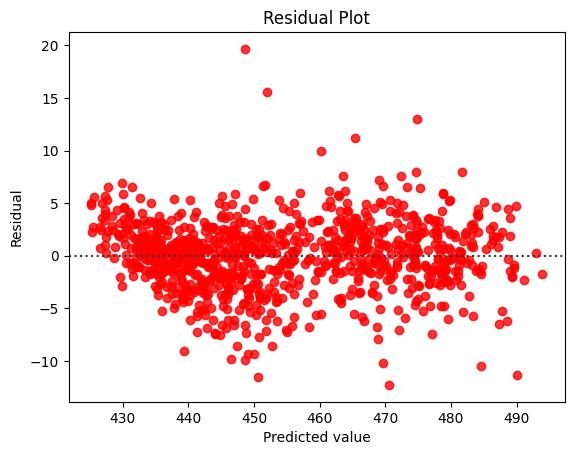

In [ ]:
import seaborn as sns
sns.residplot(x=y_test_90_10, y=y_pred_90_10, color='red')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

Testing for 80 20 split

In [ ]:
gbrt = GradientBoostingRegressor(n_estimators=450, max_depth=20, learning_rate=0.1, loss='quantile', alpha=0.1)

gbrt.fit(x_train_80_20, y_train_80_20)

In [ ]:
y_predict_80_20 = gbrt.predict(x_test_80_20)

In [ ]:
scores_80_20={'Model name': ["Linear regression","KNN","Gradientboosted Regression","ANN"], "mse":[],"R^2":[],"rmse":[],"mae":[]}

In [ ]:
r2 = r2_score(y_test_80_20, y_predict_80_20)
mse=mean_squared_error(y_test_80_20, y_predict_80_20)
rmse=sqrt(mse)
mae=mean_absolute_error(y_test_80_20,y_predict_80_20)
scores_80_20['mse'].append(mse)
scores_80_20['R^2'].append(r2)
scores_80_20['rmse'].append(rmse)
scores_80_20['R^2'].append(mae)
print("R^2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(r2,mse,rmse,mae))

R^2: 0.95, MSE: 14.95, RMSE: 3.87, MAE: 2.89


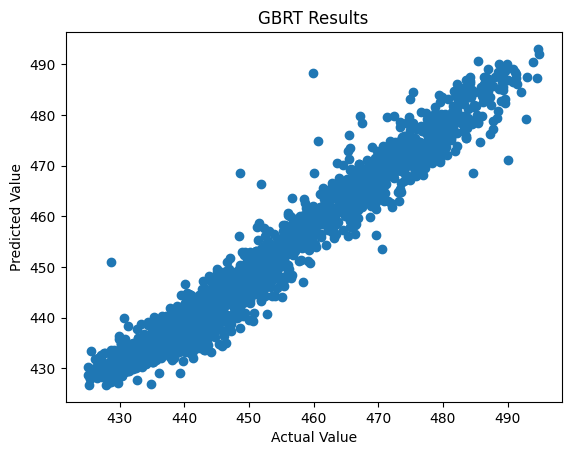

In [ ]:
plt.scatter(y_test_80_20, y_predict_80_20)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title("GBRT Results")
plt.show()

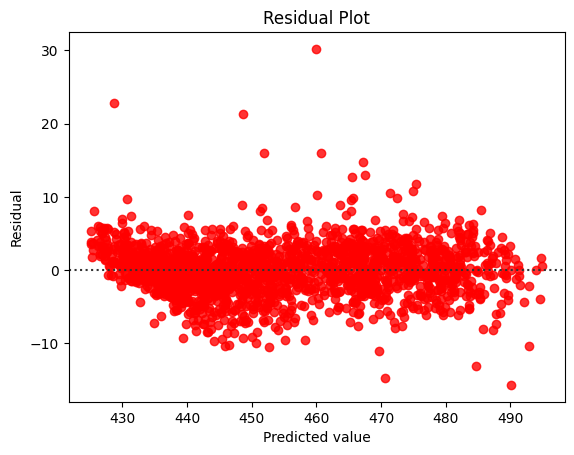

In [ ]:
import seaborn as sns
sns.residplot(x=y_test_80_20, y=y_predict_80_20, color='red')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

In [ ]:
gbrt.score(x_test_80_20,y_test_80_20)

0.9477451378731755